# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Ames Housing Data again!

We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

# using 9 predictive categorical or continuous features, plus the target SalePrice
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

In [2]:
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

### Perform a train-test split

In [3]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split as t_t_s
X_tr, X_te, y_tr, y_te = t_t_s(X, y)

### Apply your model to the train set

In [4]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [5]:
# Fit the model to train data
linreg.fit(X_tr,y_tr)

LinearRegression()

### Calculate predictions on training and test sets

In [6]:
# Calculate predictions on training and test sets
y_trhat = linreg.predict(X_tr)
y_tehat = linreg.predict(X_te)

### Calculate training and test residuals

In [7]:
# Calculate residuals
y_trres = y_trhat - y_tr
y_teres = y_tehat - y_te

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [8]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error as mse

In [9]:
# Calculate training and test MSE
train_mse = mse(y_tr, y_trhat)
test_mse = mse(y_te, y_tehat)
print(f'''
Training MSE: {train_mse}
Testing MSE: {test_mse}
''')


Training MSE: 0.17526339853245945
Testing MSE: 0.12633313600708412



If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

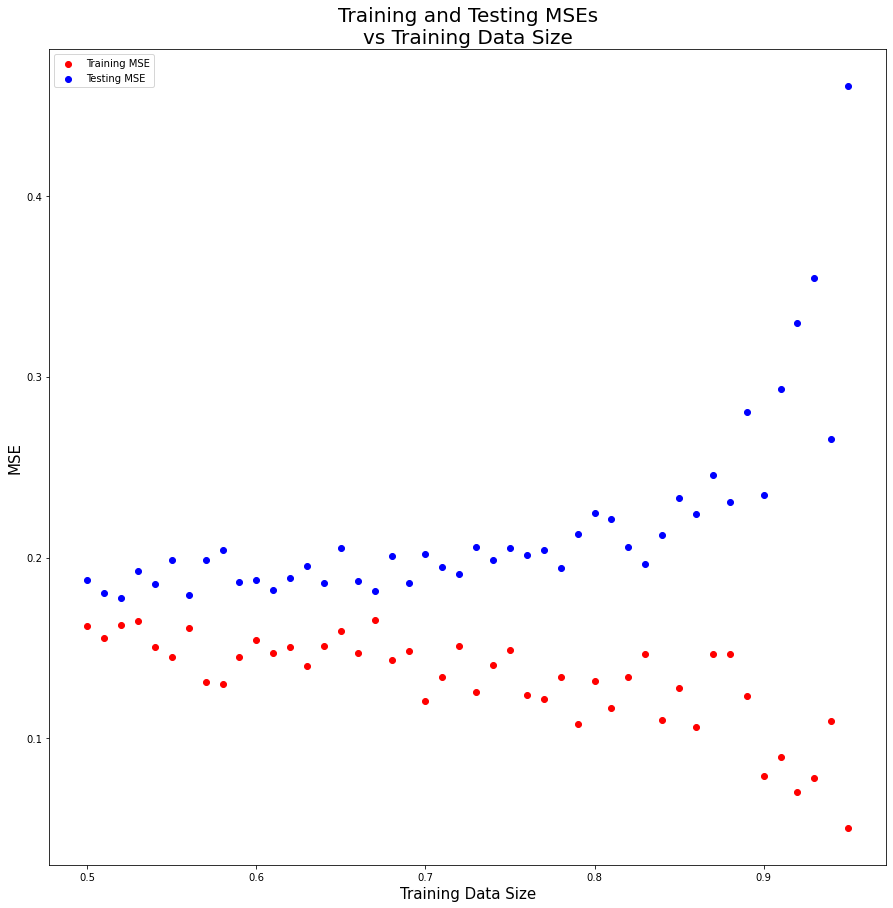

In [28]:
# Your code here
train_sizes = np.linspace(0.5, 0.95, 46)
train_mses = []
test_mses = []

for size in train_sizes:
    while 1:
        X_tr, X_te, y_tr, y_te = t_t_s(X, y, test_size = size)
        linreg = LinearRegression()
        linreg.fit(X_tr, y_tr)
        if linreg.score(X_te, y_te) < 0.1:
            continue
        y_trhat = linreg.predict(X_tr)
        y_tehat = linreg.predict(X_te)
        train_mse = mse(y_tr, y_trhat)
        test_mse = mse(y_te, y_tehat)
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        break
    
fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(train_sizes, train_mses, color = 'red', label = 'Training MSE')
ax.scatter(train_sizes, test_mses, color = 'blue', label = 'Testing MSE')
ax.set_title('Training and Testing MSEs\nvs Training Data Size', fontsize = 20)
ax.set_xlabel('Training Data Size', fontsize = 15)
ax.set_ylabel('MSE', fontsize = 15)
plt.legend();

In [32]:
# NOTE: I added the linreg.score() check because occasionally,
# the random sampling resulted in a negative R2 value of
# magnitude 10 to the 20+. Clearly, this is a result
# of an extremely unrepresentative training subset
# and/or a screw-up in calculating the fit

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

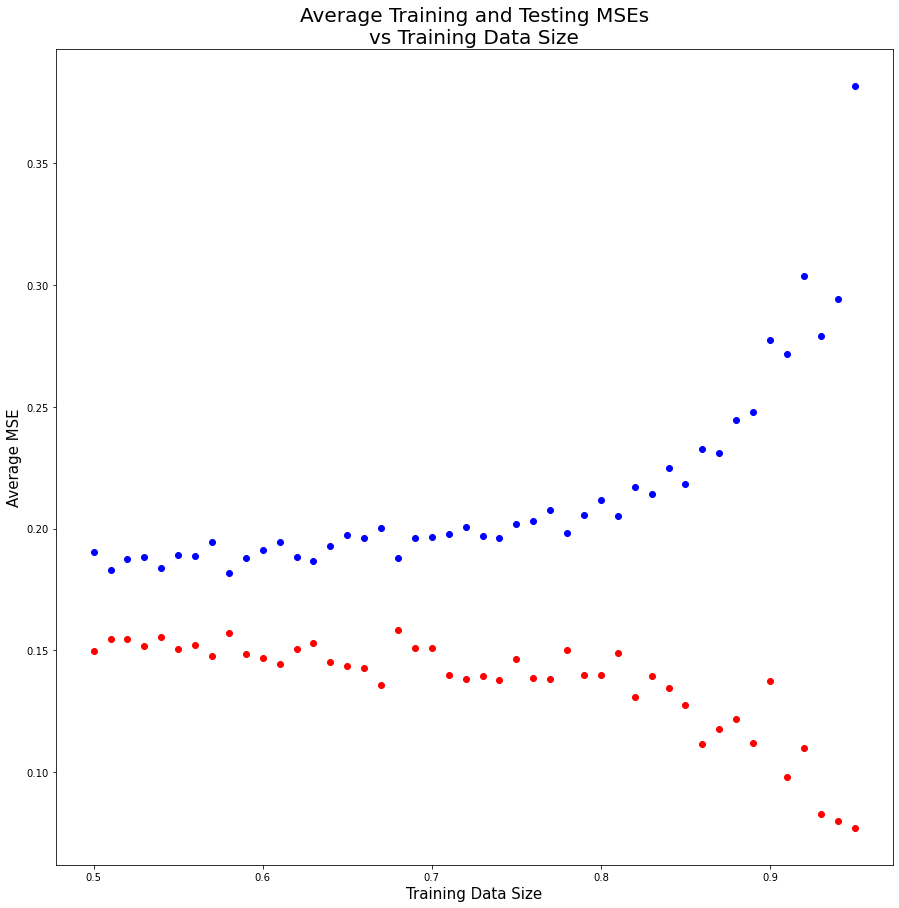

In [29]:
# Your code here
train_sizes = np.linspace(0.5, 0.95, 46)
train_mses = []
test_mses = []

for size in train_sizes:
    train_mse_samples = []
    test_mse_samples = []
    count = 0
    while count != 10:
        while 1:
            X_tr, X_te, y_tr, y_te = t_t_s(X, y, test_size = size)
            linreg = LinearRegression()
            linreg.fit(X_tr, y_tr)
            if linreg.score(X_te,y_te) < 0.1:
                continue
            y_trhat = linreg.predict(X_tr)
            y_tehat = linreg.predict(X_te)
            train_mse = mse(y_tr, y_trhat)
            test_mse = mse(y_te, y_tehat)
            train_mse_samples.append(train_mse)
            test_mse_samples.append(test_mse)
            count += 1
            break
            
    train_mses.append(sum(train_mse_samples)/len(train_mse_samples))
    test_mses.append(sum(test_mse_samples)/len(test_mse_samples))
    
fig, ax = plt.subplots(figsize = (15,15))

ax.scatter(train_sizes, train_mses, color = 'red', label = 'Training MSE')
ax.scatter(train_sizes, test_mses, color = 'blue', label = 'Testing MSE')
ax.set_title('Average Training and Testing MSEs\nvs Training Data Size', fontsize = 20)
ax.set_xlabel('Training Data Size', fontsize = 15)
ax.set_ylabel('Average MSE', fontsize = 15);

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.